# Phenology of Fish and Inverebrates in Mobile Bay, AL
Jeffrey D. Plumlee, Ph.D., Postdoctoral Fellow at the University of South Alabama

March 9, 2023.

In [1]:
#Suppress the library warning messages
suppressPackageStartupMessages({
    library(ggplot2)
    library(dplyr)
    library(tidyr) 
    library(mgcv)
    library(lubridate)
})

## About the data
Say where the data came from.  What is a row?

In [2]:
#Read the file
dirname <- getwd()
filename <- 'all_species_enviro.csv'
df <- read.csv(file.path(dirname,filename))
cat("File",filename,"has",nrow(df),"rows,",ncol(df),"columns and contains the following:\n")
print(names(df))
cat("Includes years", min(df$year), "to", max(df$year), ", categorized into decades",min(df$decade),"to",max(df$decade),"\n")

File all_species_enviro.csv has 626 rows, 53 columns and contains the following:
 [1] "year"             "Median"           "Range"            "n"               
 [5] "species"          "group"            "season"           "decade"          
 [9] "baseline_median"  "baseline_range"   "diff_median"      "diff_range"      
[13] "spring_dp10"      "spring_d32"       "spring_emxp"      "spring_prcp"     
[17] "spring_tavg"      "spring_tmax"      "spring_tmin"      "fall_dp10"       
[21] "fall_d32"         "fall_emxp"        "fall_prcp"        "fall_tavg"       
[25] "fall_tmax"        "fall_tmin"        "winter_dp10"      "winter_dx32"     
[29] "winter_emxp"      "winter_prcp"      "winter_tavg"      "winter_tmax"     
[33] "winter_tmin"      "yearly_dp10"      "yearly_dx32"      "yearly_emxp"     
[37] "yearly_prcp"      "yearly_tavg"      "yearly_tmin"      "yearly_tmax"     
[41] "spring_temp"      "fall_temp"        "winter_temp"      "yearly_temp"     
[45] "hurricane"        "spr

## Pelagic Forage

`p_prey` = pelagic prey

We exclude Butterfish because ... (?)

[NOAA: What are pelagic fish?](https://oceanservice.noaa.gov/facts/pelagic.html) *Pelagic fish inhabit the water column (not near the bottom or the shore) of coasts, open oceans, and lakes.*

In [3]:
#Pelagic Prey, exclude Butterfish and omit NaNs
p_prey <- df[df$group == "Pelagic Prey",]
p_prey <- na.omit(p_prey[p_prey$species != "Butterfish",])

## Benthic Forage

`b_prey` = benthic prey

We exclude Mojarra because ... (?)

In [4]:
#Benthic Prey except Mojarra, omit NaN
b_prey <- df[df$group == "Benthic Prey",]
b_prey <- na.omit(b_prey[b_prey$species != "Mojarra",])

## Fishery Species

`f_spec` = fishery species

Whiting, Sand Seatrout, and Pigfish are excluded because...

In [5]:
f_spec <- df[df$group == "Fishery Species",]
f_spec <- na.omit(f_spec[f_spec$species != "Whiting",])
f_spec <- na.omit(f_spec[f_spec$species != "Sand Seatrout",])
f_spec <- na.omit(f_spec[f_spec$species != "Pigfish",])

## Changes in the phenology of recruitment

The following plots show changes in the phenology of recruitment from the 1980s to 2000 - 2020 for forage and economically-important fisheries species. 

Color corresponds to the season where peak recruitment for each species occurred.

In [6]:
#General plot options
options(repr.plot.width=15, repr.plot.height=6)

## Difference in Median Peak Day of the Year
### Pelagic Forage

Warning message in p_prey$decade == c("2000", "2010"):
“longer object length is not a multiple of shorter object length”


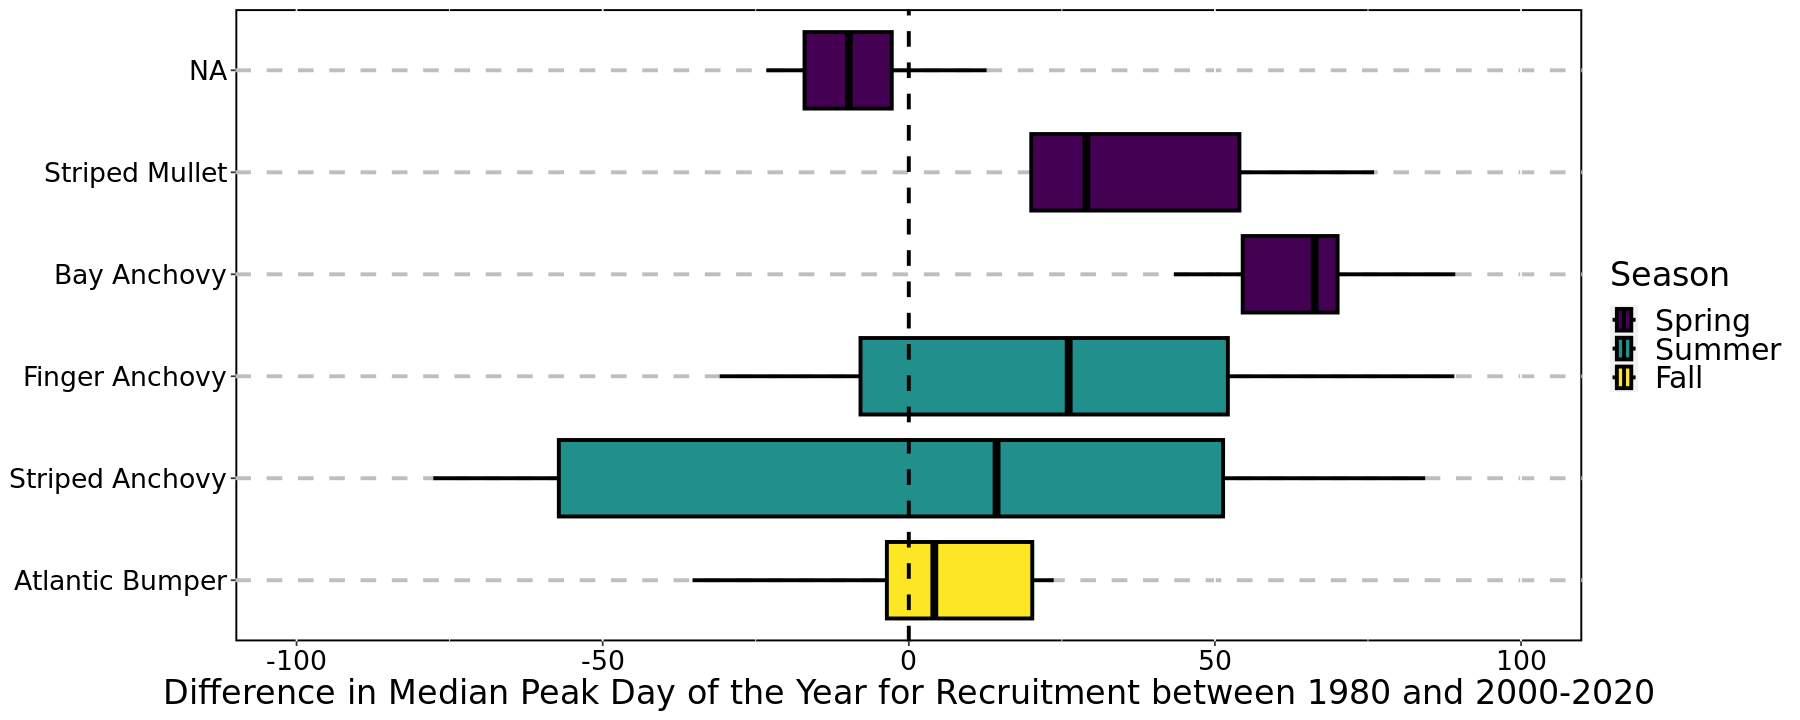

In [7]:
#For R to respect the order in data.frame, we need to change the order of **factor** levels by specifying the order explicitly.
p_prey$species <- factor(p_prey$species, levels = c("Atlantic Bumper", "Striped Anchovy", "Finger Anchovy", "Gulf Menhaden", "Bay Anchovy", "Striped Mullet"))
p_prey$season <- factor(p_prey$season, levels = c("Spring", "Summer", "Fall"))
ggplot( p_prey[p_prey$decade == c("2000", "2010"),], 
    aes(y = species, x = diff_median, fill = season)) +
    geom_boxplot(outlier.shape = NA, size = 1.1, color = "black") +
    scale_fill_viridis_d() +
    geom_vline(xintercept = 0, linetype = "dashed", linewidth = 1.1) +
    xlim(-100,100) +
    labs(x = "Difference in Median Peak Day of the Year for Recruitment between 1980 and 2000-2020", fill = "Season") +
    theme(panel.background = element_rect(fill = "white", color = "black", linewidth = 1.1), 
        axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", linewidth = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 20), axis.text = element_text(color = "black", family = "sans", size = 16), 
        legend.title = element_text(color = "black", family = "sans", size = 20), legend.text = element_text(color = "black", family = "sans", size = 18))

## Difference in Median Peak Day of the Year
### Benthic Forage

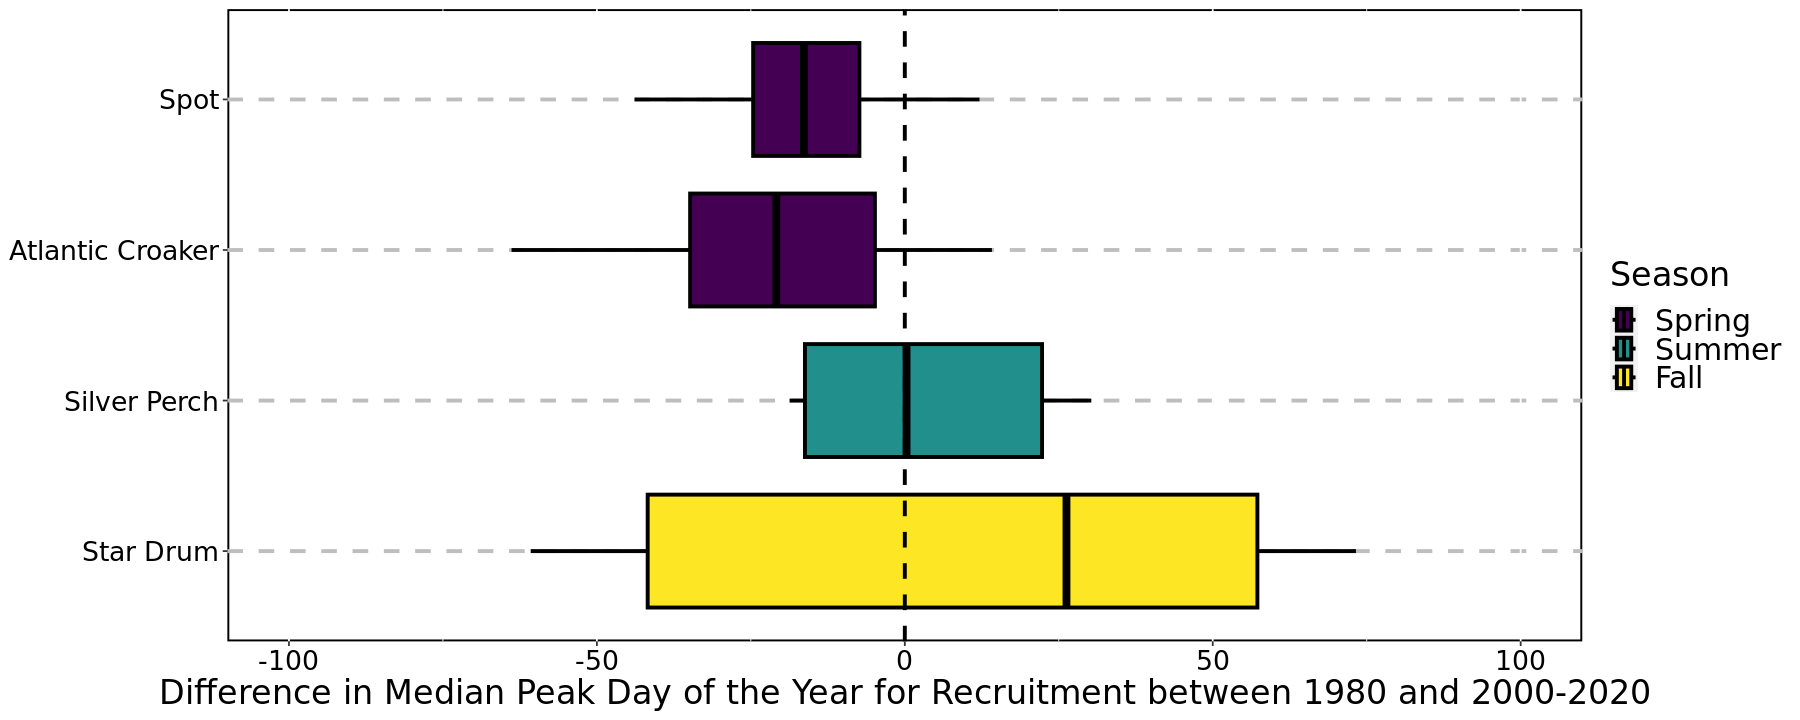

In [8]:
b_prey$species <- factor(b_prey$species, levels = c("Star Drum", "Silver Perch", "Atlantic Croaker", "Spot"))
b_prey$season <- factor(b_prey$season, levels = c("Spring", "Summer", "Fall"))
ggplot(b_prey[b_prey$decade == c("2000", "2010"),], aes(y = species, x = diff_median, fill = season)) +
  geom_boxplot(outlier.shape = NA, size = 1.1, color = "black", na.rm=TRUE) +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", linewidth = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Median Peak Day of the Year for Recruitment between 1980 and 2000-2020", fill = "Season") +
    theme(panel.background = element_rect(fill = "white", color = "black", linewidth = 1.1), 
        axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", linewidth = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 20), axis.text = element_text(color = "black", family = "sans", size = 16), 
        legend.title = element_text(color = "black", family = "sans", size = 20), legend.text = element_text(color = "black", family = "sans", size = 18))


## Difference in Median Peak Day of the Year
### Fisheries Species

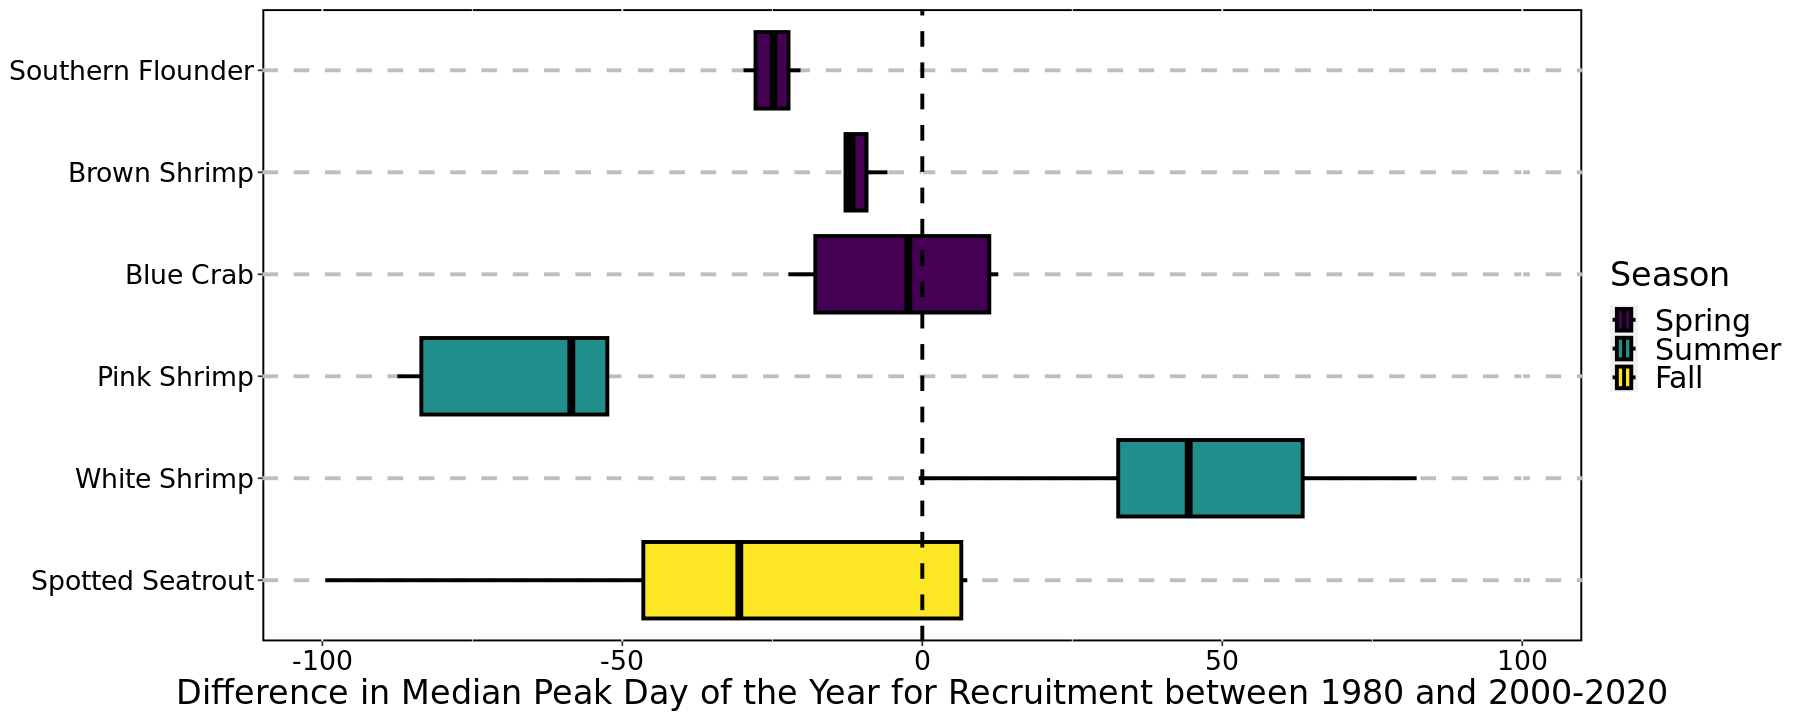

In [9]:
f_spec$species <- factor(f_spec$species, levels = c("Spotted Seatrout", "White Shrimp", "Pink Shrimp", "Blue Crab", "Brown Shrimp", "Southern Flounder"))
f_spec$season <- factor(f_spec$season, levels = c("Spring", "Summer", "Fall"))
ggplot(f_spec[f_spec$decade == c("2000", "2010"),], aes(y = species, x = diff_median, fill = season)) +
  geom_boxplot(outlier.shape = NA, linewidth = 1.1, color = "black", na.rm=TRUE) +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", linewidth = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Median Peak Day of the Year for Recruitment between 1980 and 2000-2020", fill = "Season") +
  theme(panel.background = element_rect(fill = "white", color = "black", linewidth = 1.1), 
        axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", linewidth = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 20), axis.text = element_text(color = "black", family = "sans", size = 16), 
        legend.title = element_text(color = "black", family = "sans", size = 20), legend.text = element_text(color = "black", family = "sans", size = 18))

## Difference in Range of Recruitment
### Pelagic Forage

Warning message in p_prey$decade == c("2000", "2010"):
“longer object length is not a multiple of shorter object length”


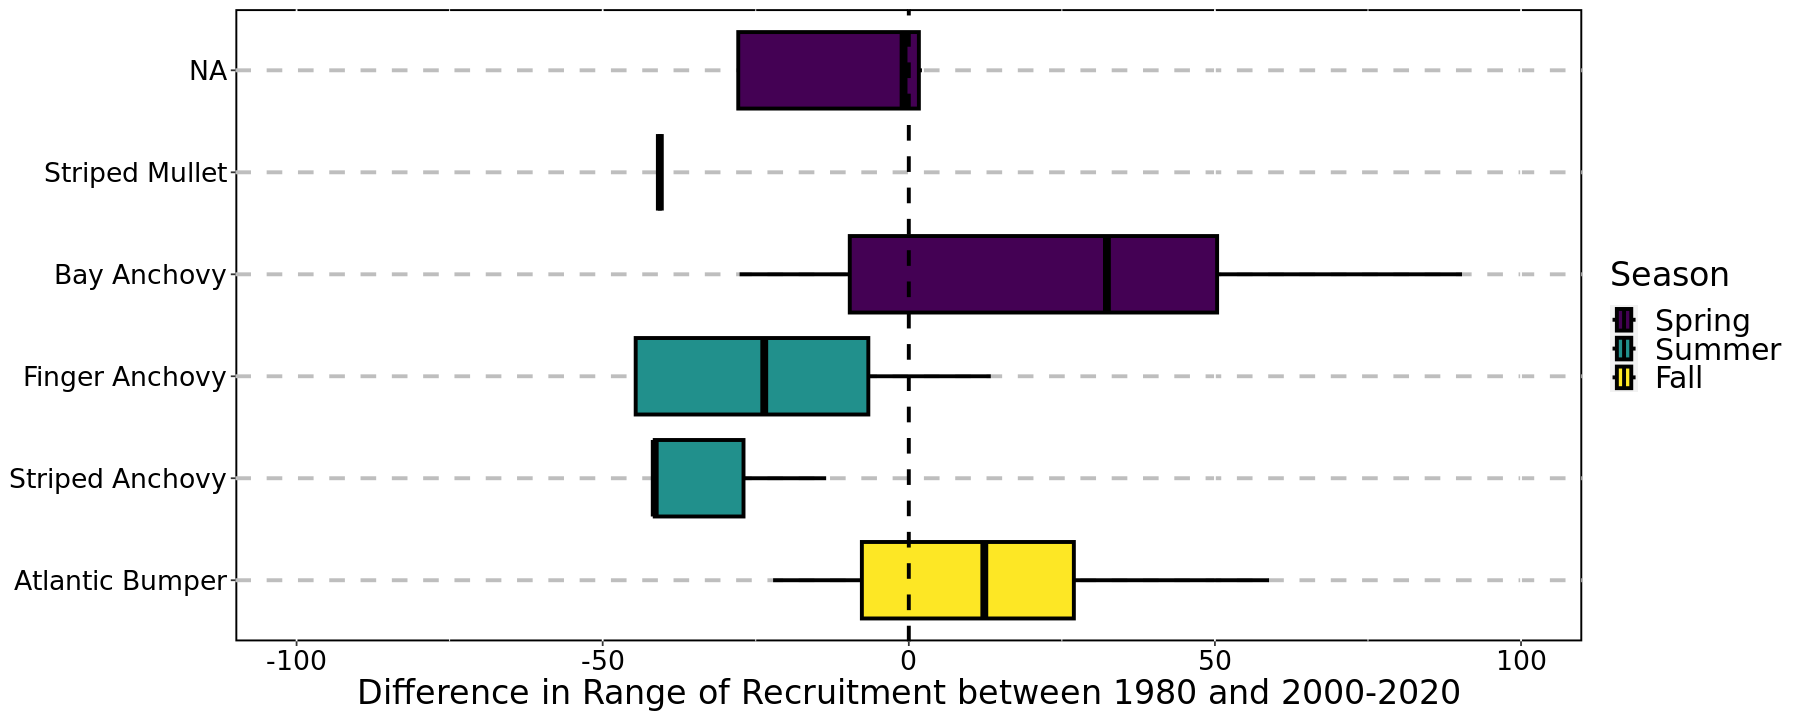

In [10]:
p_prey$species <- factor(p_prey$species, levels = c("Atlantic Bumper", "Striped Anchovy", "Finger Anchovy", "Bay Anchovy", "Gulf Menhaden", "Striped Mullet"))
p_prey$season <- factor(p_prey$season, levels = c("Spring", "Summer", "Fall"))
ggplot(p_prey[p_prey$decade == c("2000", "2010"),], aes(y = species, x = diff_range, fill = season)) +
  geom_boxplot(outlier.shape = NA, linewidth = 1.1, color = "black", na.rm=TRUE) +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", linewidth = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Range of Recruitment between 1980 and 2000-2020", fill = "Season") +
  theme(panel.background = element_rect(fill = "white", color = "black", linewidth = 1.1), 
        axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", linewidth = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 20), axis.text = element_text(color = "black", family = "sans", size = 16), 
        legend.title = element_text(color = "black", family = "sans", size = 20), legend.text = element_text(color = "black", family = "sans", size = 18))

## Difference in Range of Recruitment
### Benthic Forage

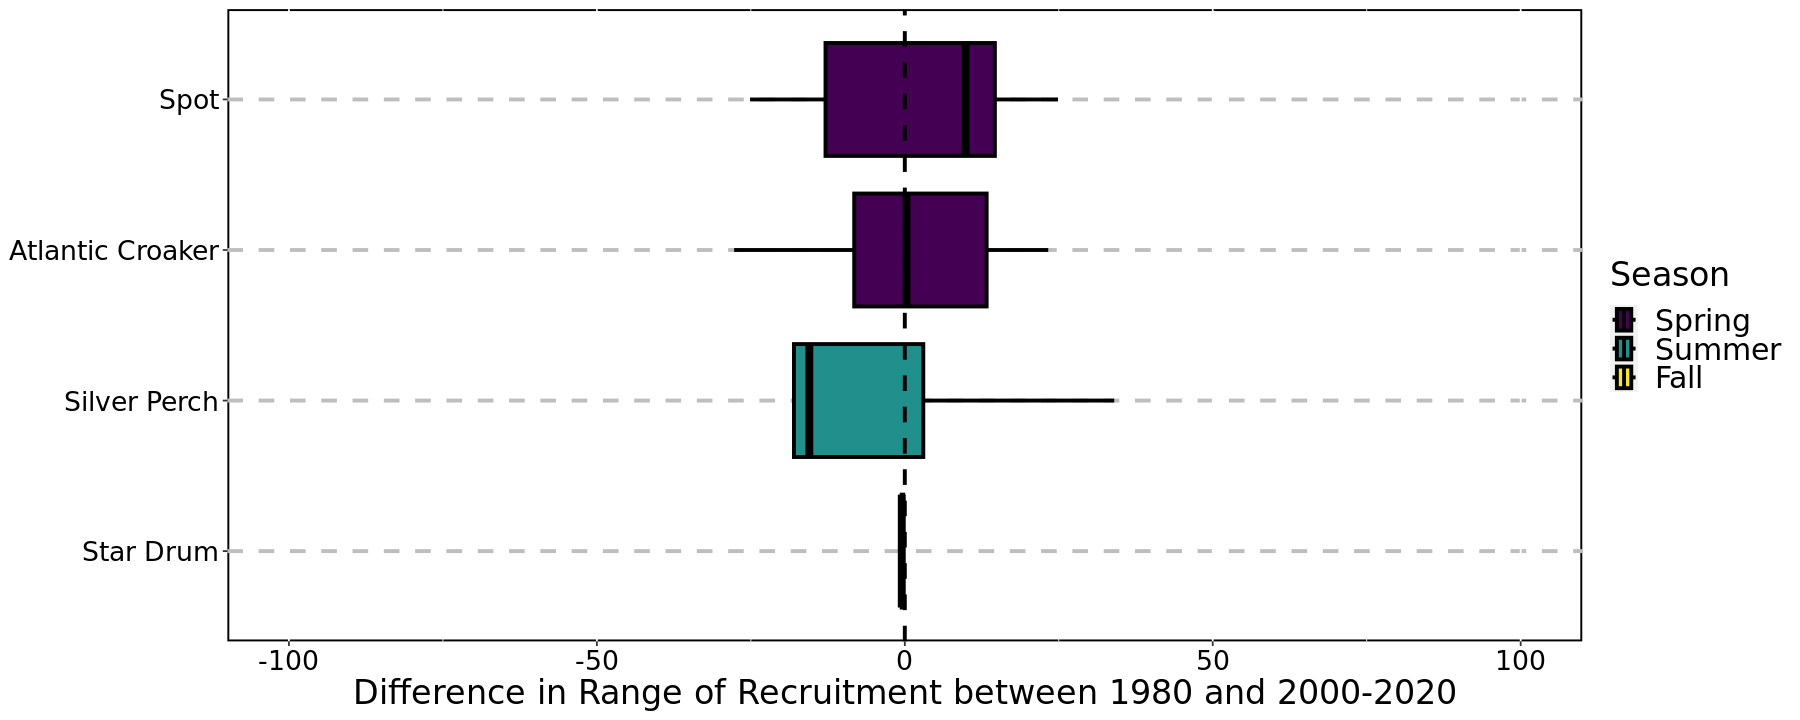

In [11]:
b_prey$species <- factor(b_prey$species, levels = c("Star Drum", "Silver Perch", "Atlantic Croaker", "Spot"))
b_prey$season <- factor(b_prey$season, levels = c("Spring", "Summer", "Fall"))
ggplot(b_prey[b_prey$decade == c("2000", "2010"),], aes(y = species, x = diff_range, fill = season)) +
  geom_boxplot(outlier.shape = NA, linewidth = 1.1, color = "black", na.rm=TRUE) +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", linewidth = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Range of Recruitment between 1980 and 2000-2020", fill = "Season") +
  theme(panel.background = element_rect(fill = "white", color = "black", linewidth = 1.1), 
        axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", linewidth = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 20), axis.text = element_text(color = "black", family = "sans", size = 16), 
        legend.title = element_text(color = "black", family = "sans", size = 20), legend.text = element_text(color = "black", family = "sans", size = 18))

## Difference in Range of Recruitment
### Fisheries Species

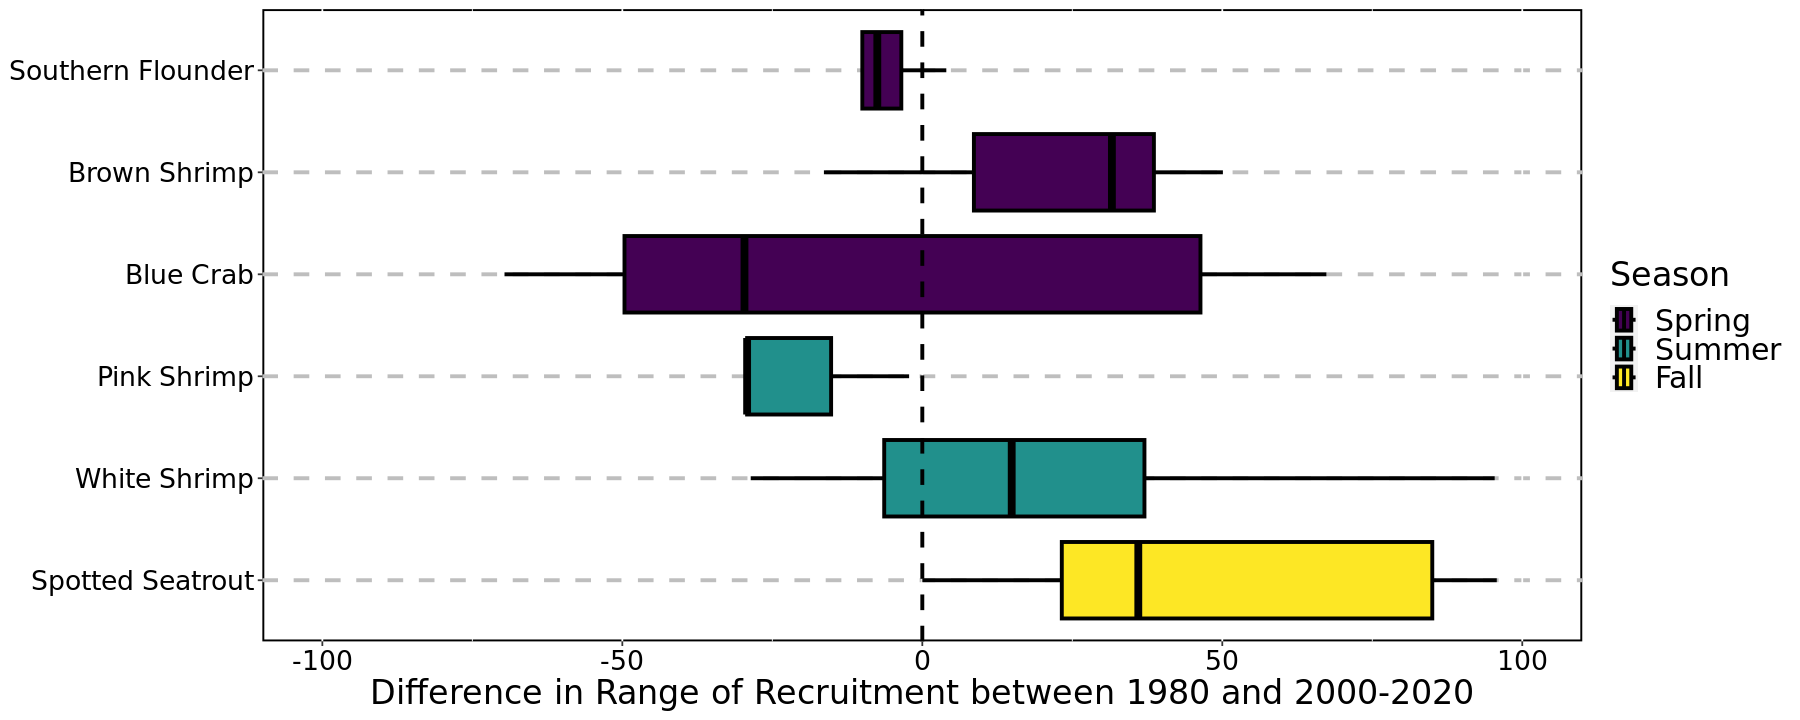

In [12]:
f_spec$species <- factor(f_spec$species, levels = c("Spotted Seatrout", "White Shrimp", "Pink Shrimp", "Blue Crab", "Brown Shrimp", "Southern Flounder"))
f_spec$season <- factor(f_spec$season, levels = c("Spring", "Summer", "Fall"))
ggplot(f_spec[f_spec$decade == c("2000", "2010"),], aes(y = species, x = diff_range, fill = season)) +
  geom_boxplot(outlier.shape = NA, linewidth = 1.1, color = "black") +
  scale_fill_viridis_d() +
  geom_vline(xintercept = 0, linetype = "dashed", linewidth = 1.1) +
  xlim(-100,100) +
  labs(x = "Difference in Range of Recruitment between 1980 and 2000-2020", fill = "Season") +
  theme(panel.background = element_rect(fill = "white", color = "black", linewidth = 1.1), 
        axis.title.y = element_blank(), panel.grid.major.y = element_line(color = "grey", linewidth = 1.10, linetype = "dashed"), 
        axis.title = element_text(color = "black", family = "sans", size = 20), axis.text = element_text(color = "black", family = "sans", size = 16), 
        legend.title = element_text(color = "black", family = "sans", size = 20), legend.text = element_text(color = "black", family = "sans", size = 18))

##  Generalized additive models
Generalized additive models depicting the relationships between average annual temperature (ºC) on the left side and annual drought index on the right side.

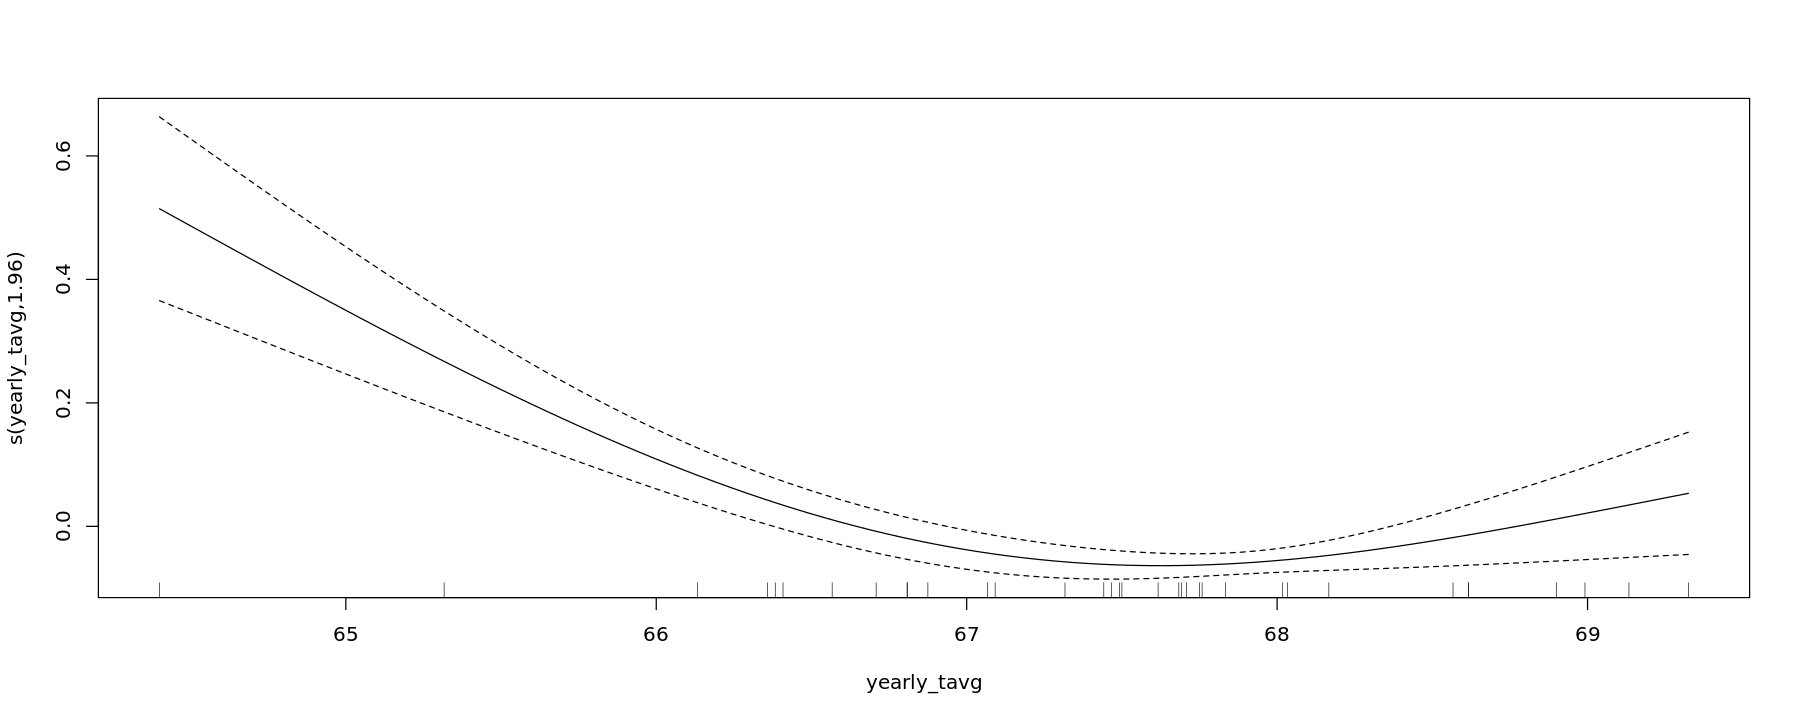

In [13]:
menhaden_median <- gam(Median ~ s(yearly_tavg, k=3), data=df[df$species == "Menhaden",], family=poisson)
menhaden_median_p <- plot(menhaden_median)

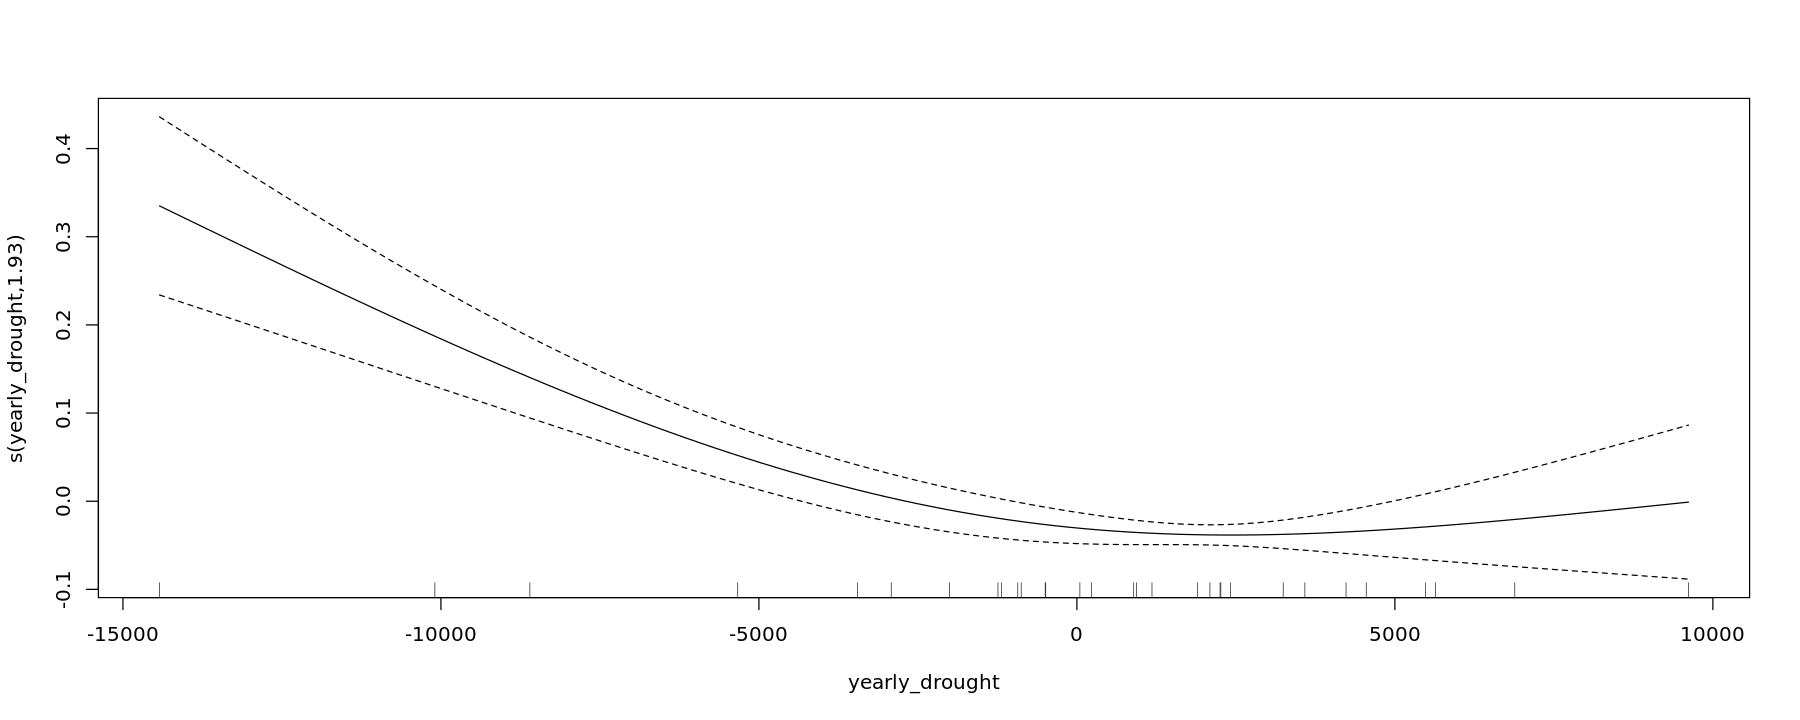

In [14]:
silverperch_median <- gam(Median ~ s(yearly_drought, k=3), data=df[df$species == "Silver Perch",], family=poisson)

silverperch_median_p <- plot(silverperch_median)

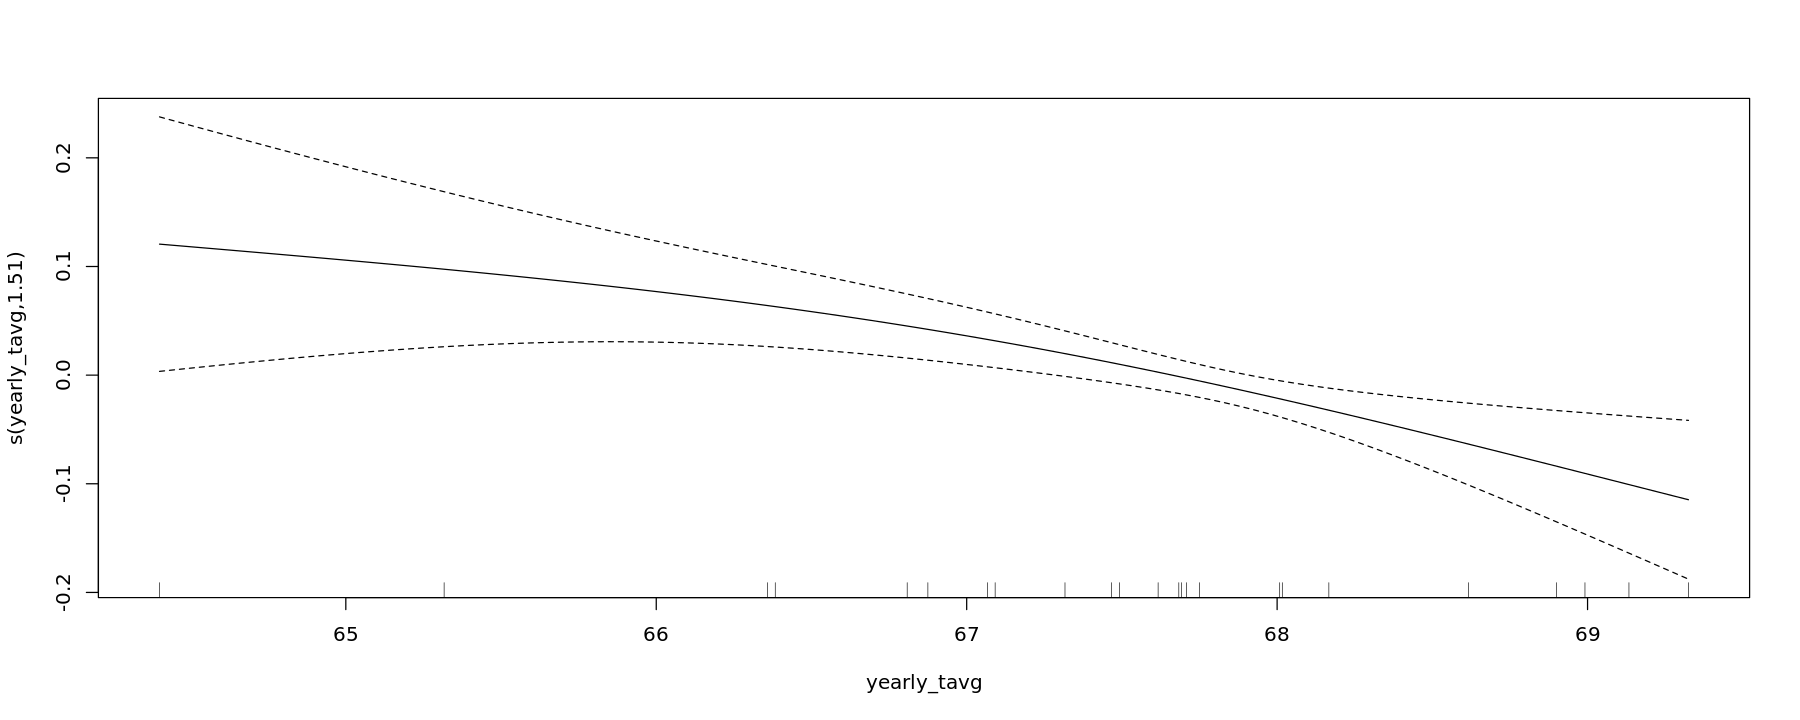

In [15]:
brownshrimp_median <- gam(Median ~ s(yearly_tavg, k=3), data=df[df$species == "Brown Shrimp",], family=poisson)

brownshrimp_median_p <- plot(brownshrimp_median)

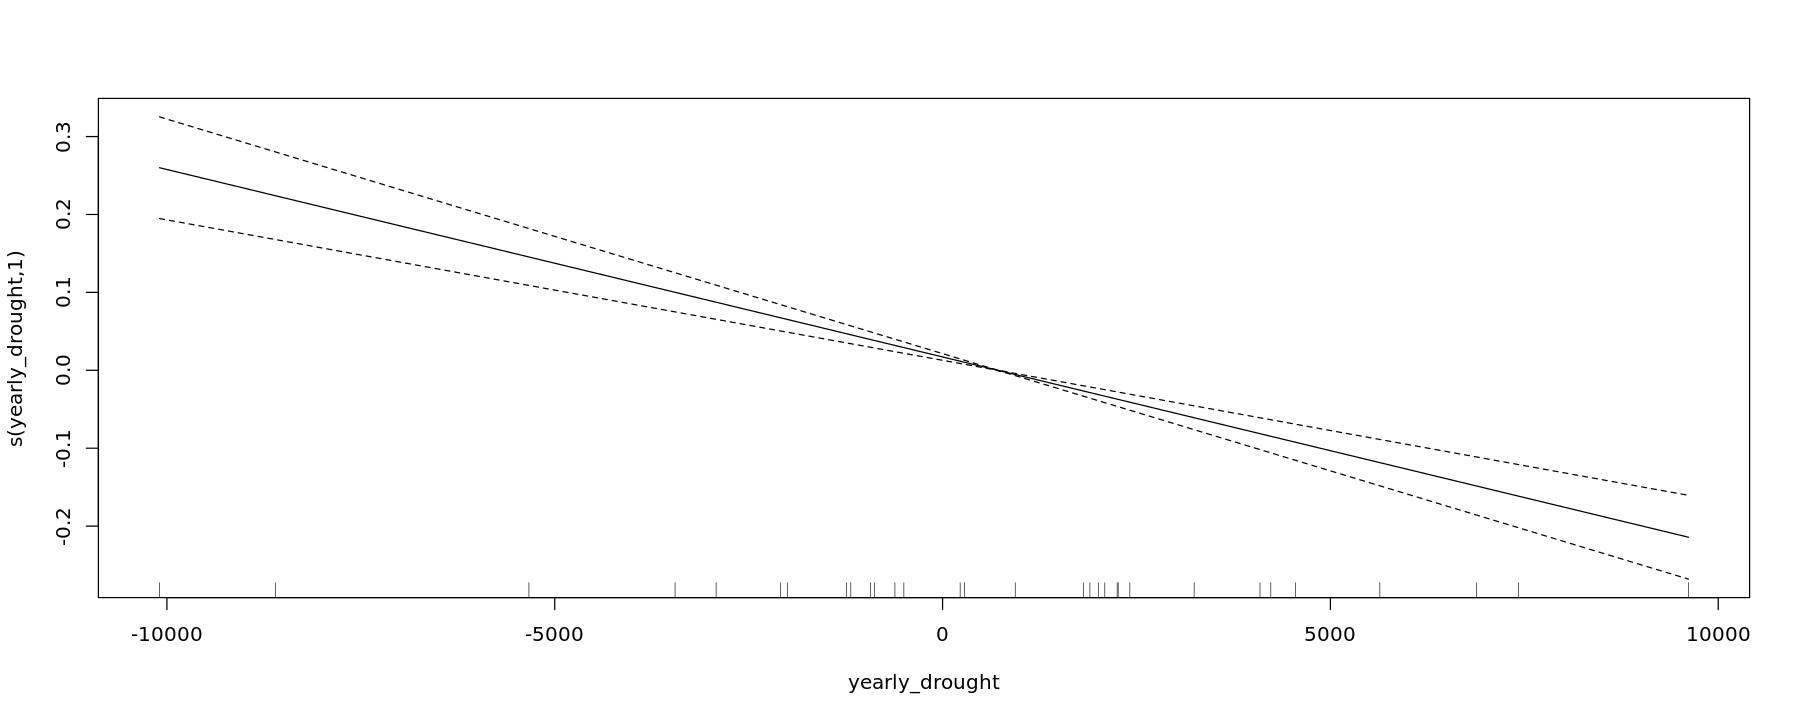

In [16]:
stripedanchovy_median <- gam(Median ~ s(yearly_drought, k=3), data=df[df$species == "Striped Anchovy",], family=poisson)

stripedanchovy_median_p <- plot(stripedanchovy_median)

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 97.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 97.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 97.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 97.500000”


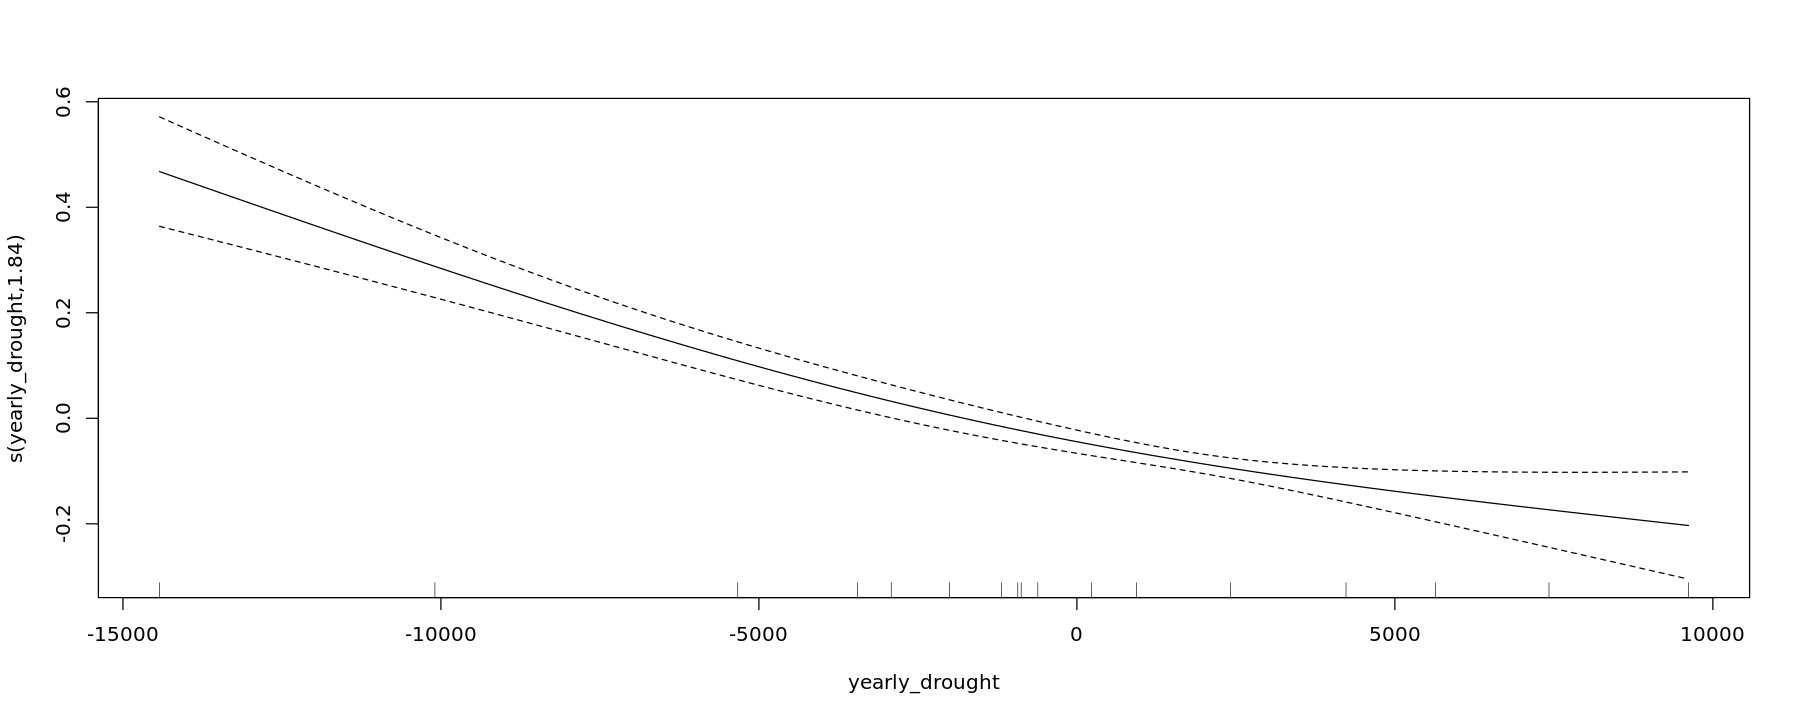

In [17]:
pinkshrimp_median <- gam(Median ~ s(yearly_drought, k=3), data=df[df$species == "Pink Shrimp",], family=poisson)

pinkshrimp_median_p <- plot(pinkshrimp_median)

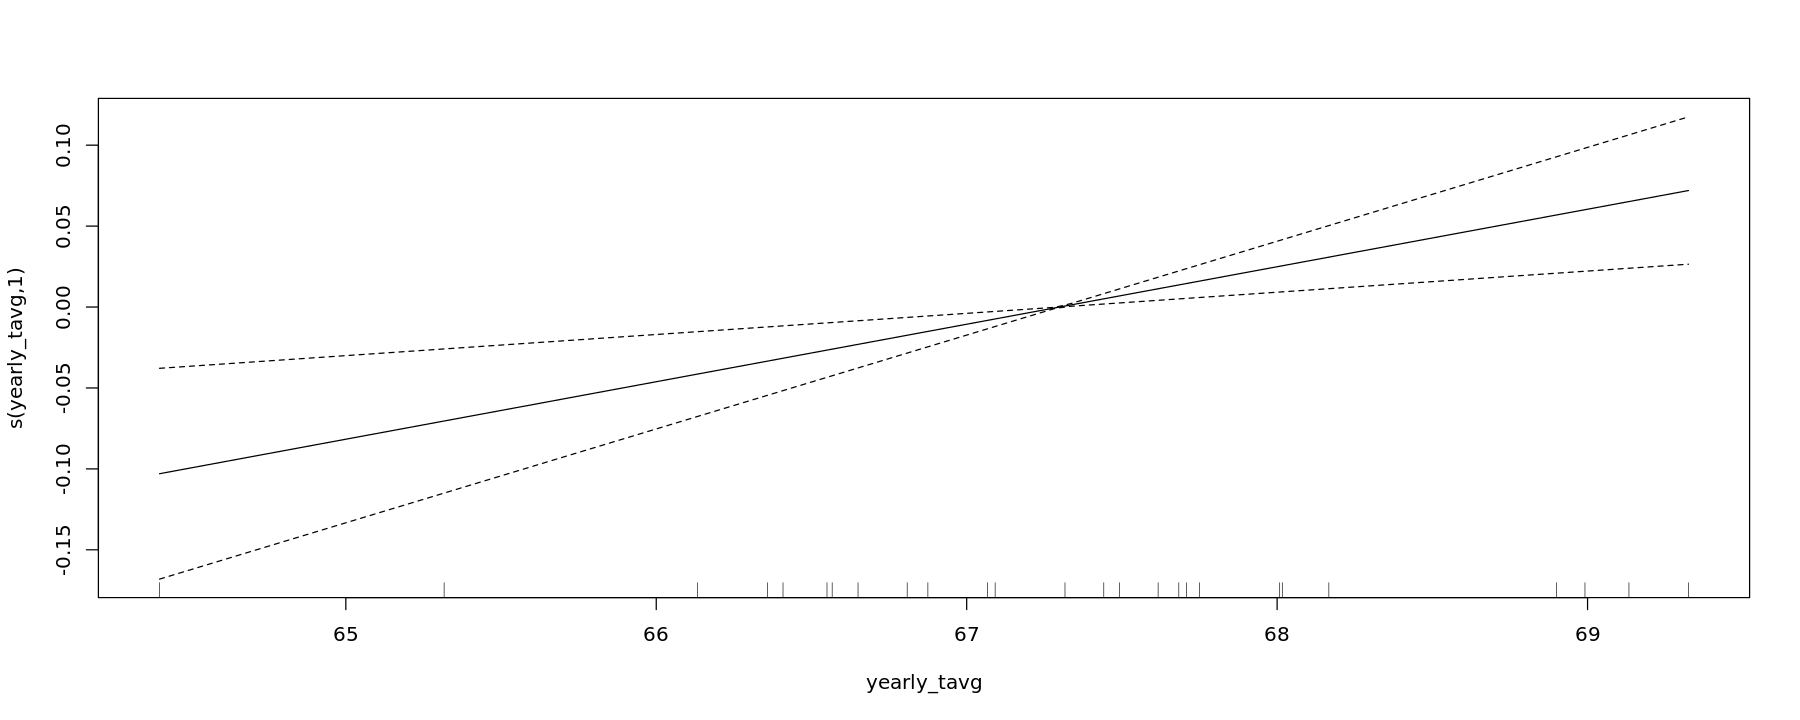

In [18]:
stardrum_median <- gam(Median ~ s(yearly_tavg, k=3), data=df[df$species == "Star Drum",], family=poisson)

stardrum_median_p <- plot(stardrum_median)

In [19]:
variables <- rbind(matrix(menhaden_median_p[[1]][["x"]]), matrix(silverperch_median_p[[1]][["x"]]), matrix(brownshrimp_median_p[[1]][["x"]]), matrix(stripedanchovy_median_p[[1]][["x"]]), matrix(pinkshrimp_median_p[[1]][["x"]]), matrix(stardrum_median_p[[1]][["x"]]))
response <- rbind(matrix(menhaden_median_p[[1]][["fit"]]), matrix(silverperch_median_p[[1]][["fit"]]), matrix(brownshrimp_median_p[[1]][["fit"]]), matrix(stripedanchovy_median_p[[1]][["fit"]]), matrix(pinkshrimp_median_p[[1]][["fit"]]), matrix(stardrum_median_p[[1]][["fit"]]))
error <- rbind(matrix(menhaden_median_p[[1]][["se"]]), matrix(silverperch_median_p[[1]][["se"]]), matrix(brownshrimp_median_p[[1]][["se"]]), matrix(stripedanchovy_median_p[[1]][["se"]]), matrix(pinkshrimp_median_p[[1]][["se"]]), matrix(stardrum_median_p[[1]][["se"]]))
species <- rbind(matrix(rep("Menhaden", 100)), matrix(rep("Silver Perch", 100)), matrix(rep("Brown Shrimp", 100)), matrix(rep("Striped Anchovy", 100)), matrix(rep("Pink Shrimp", 100)), matrix(rep("Star Drum", 100)))
median_tavg <- cbind(variables, response, error, species) 
colnames(median_tavg) <- c("Variable", "Response", "Error", "Species")
median_tavg <- as.data.frame(median_tavg)

median_tavg$Variable <- as.numeric(median_tavg$Variable)
median_tavg$Response <- as.numeric(median_tavg$Response)
median_tavg$Error <- as.numeric(median_tavg$Error)
median_tavg$Species <- as.factor(median_tavg$Species)

menhaden <- median_tavg[median_tavg$Species == "Menhaden",]
menhaden$Variable <- (menhaden$Variable-32)*5/9

brownshrimp <- median_tavg[median_tavg$Species == "Brown Shrimp",]
brownshrimp$Variable <- (brownshrimp$Variable-32)*5/9

stardrum <- median_tavg[median_tavg$Species == "Star Drum",]
stardrum$Variable <- (stardrum$Variable-32)*5/9

silverperch <- median_tavg[median_tavg$Species == "Silver Perch",]
silverperch <- silverperch[silverperch$Variable >= -10000,]

stripedanchovy <- median_tavg[median_tavg$Species == "Striped Anchovy",]

pinkshrimp <- median_tavg[median_tavg$Species == "Pink Shrimp",]
pinkshrimp <- pinkshrimp[pinkshrimp$Variable >= -10000,]


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


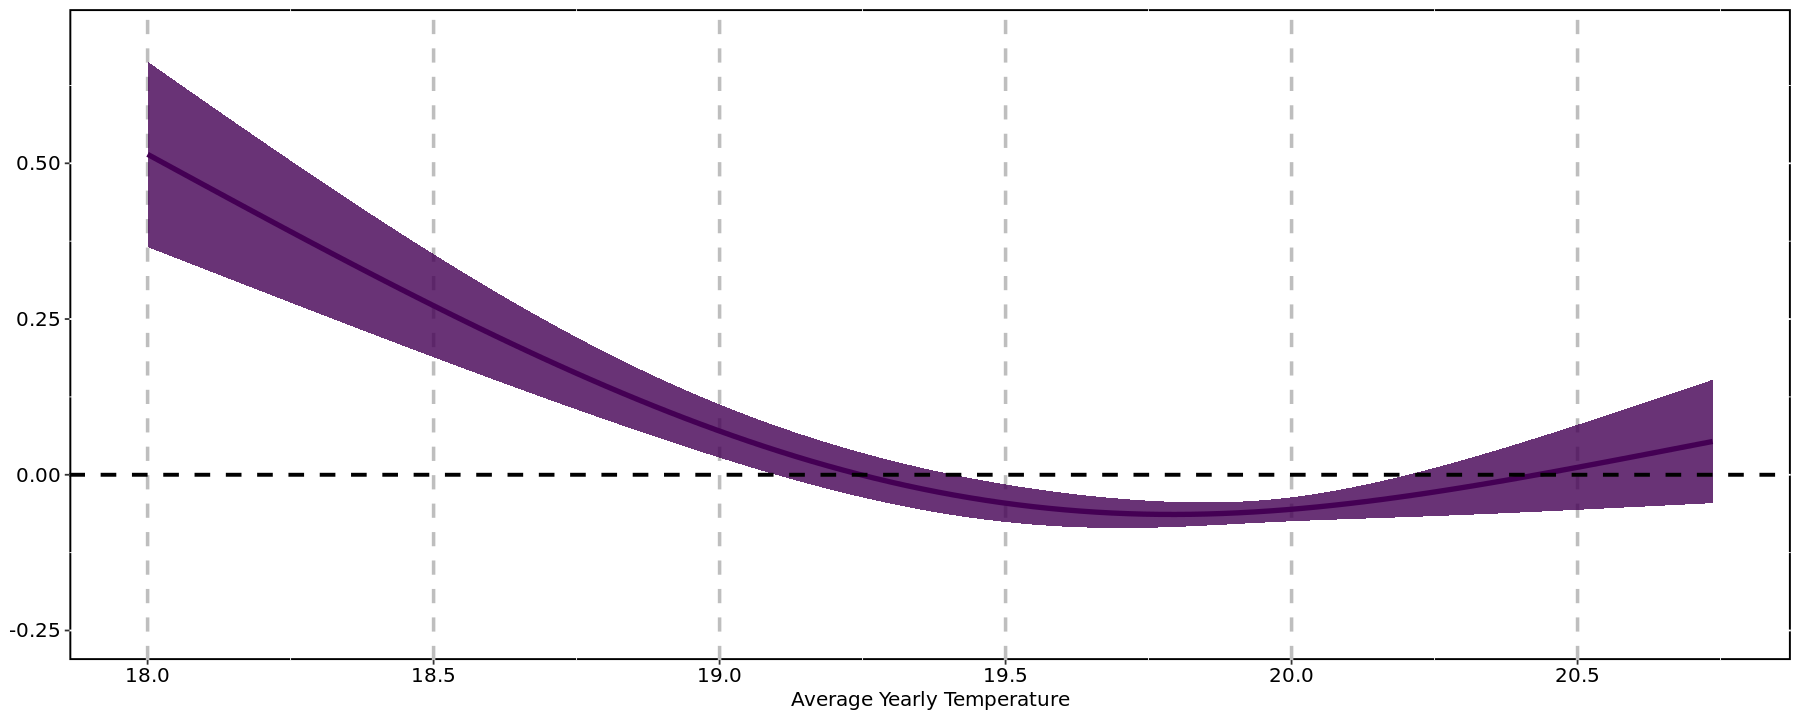

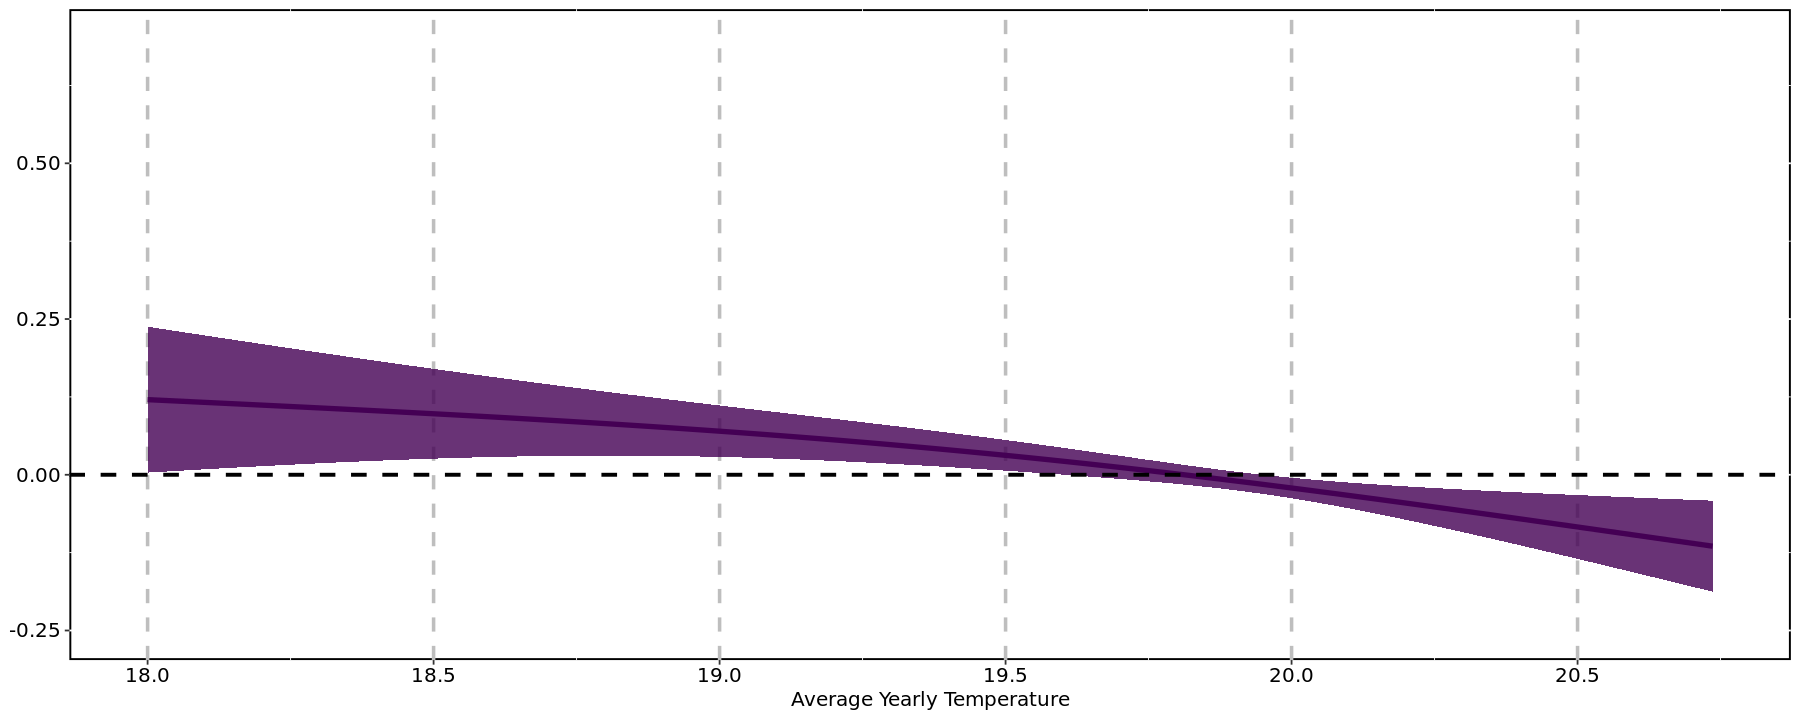

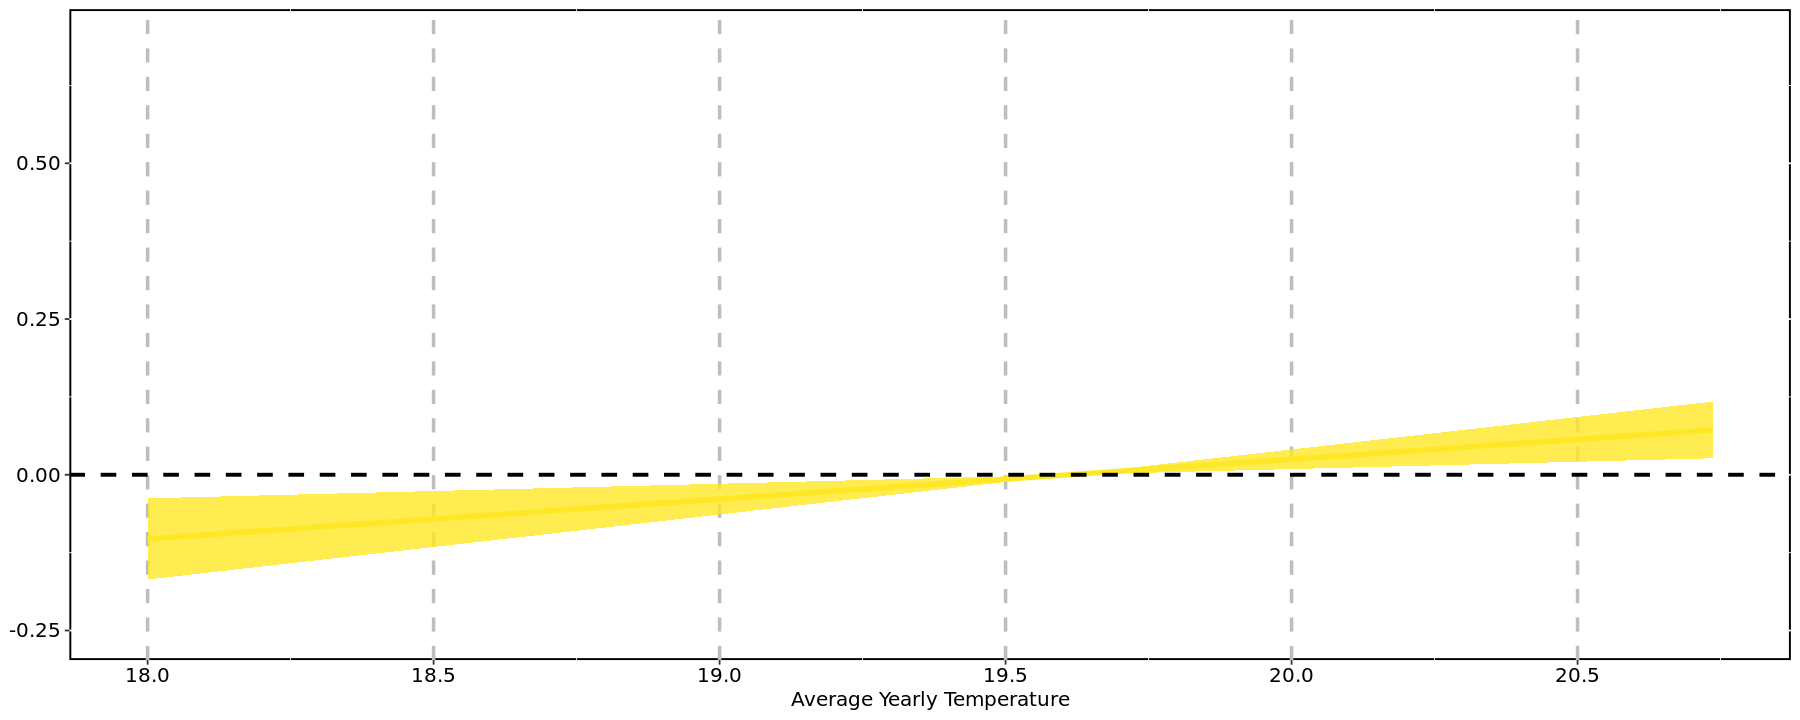

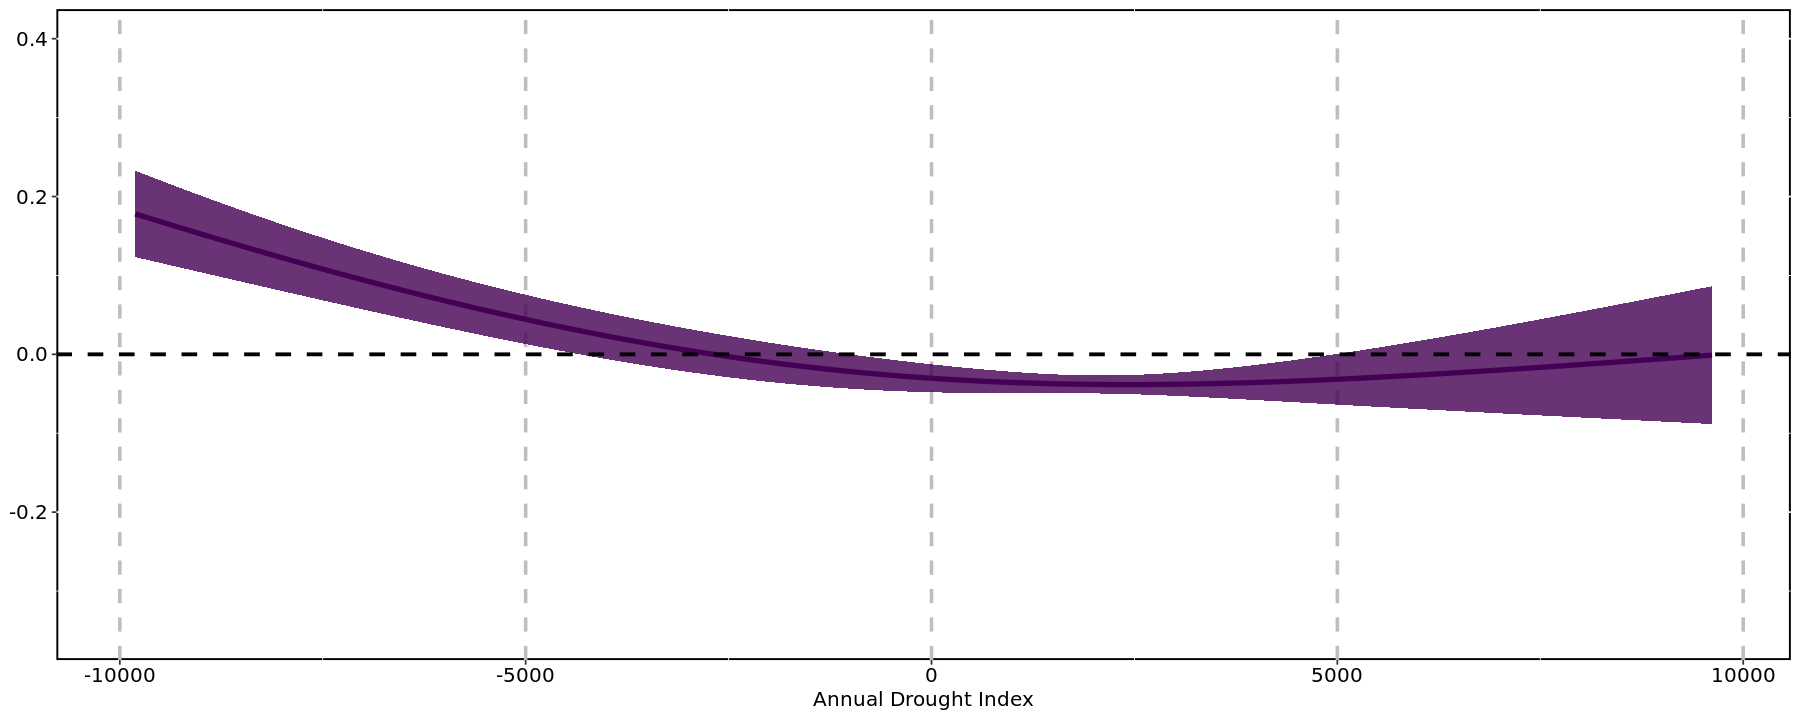

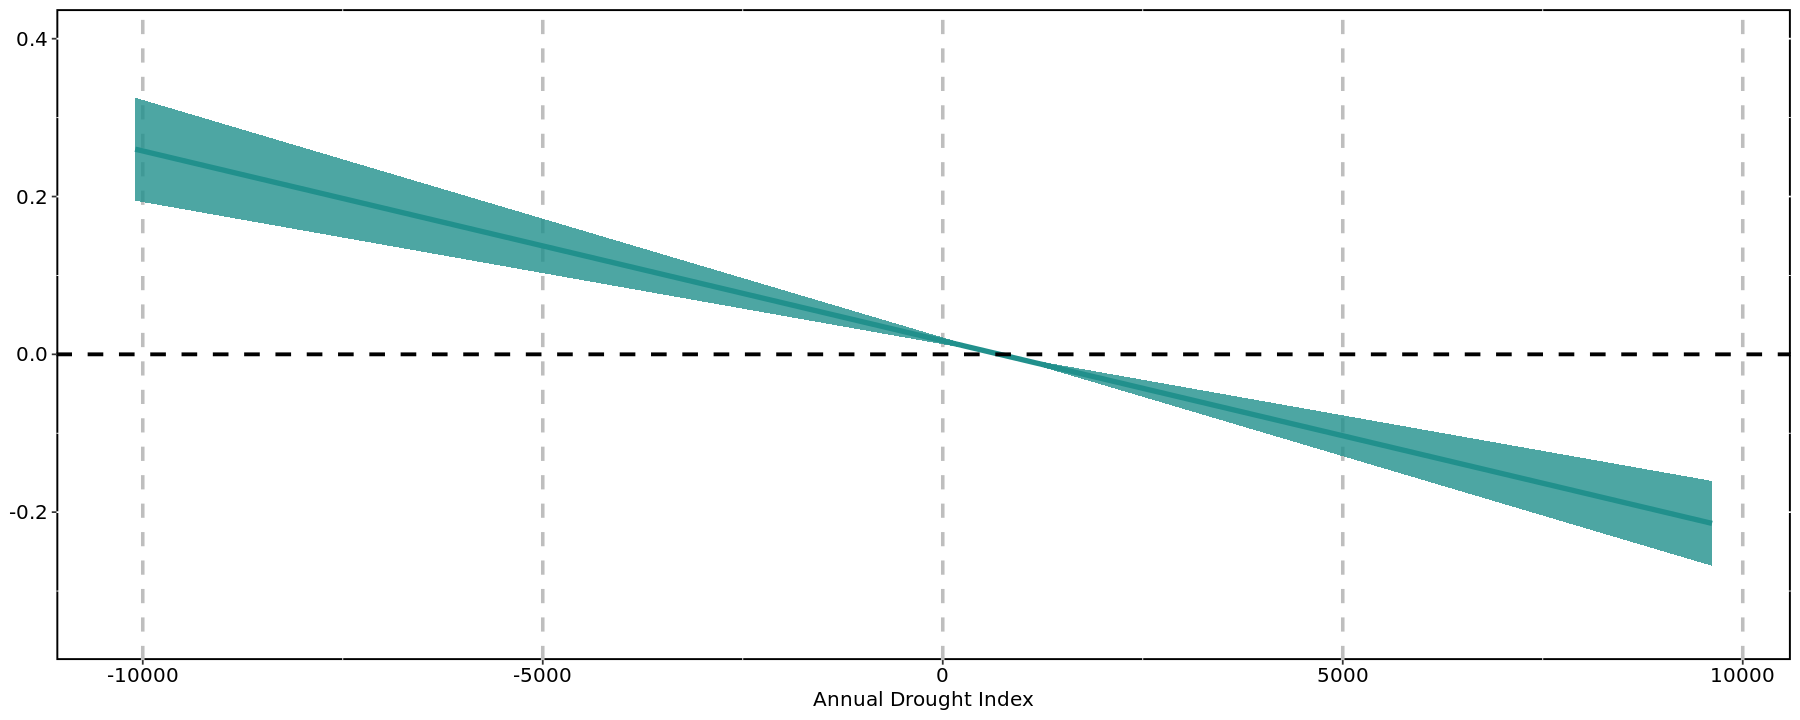

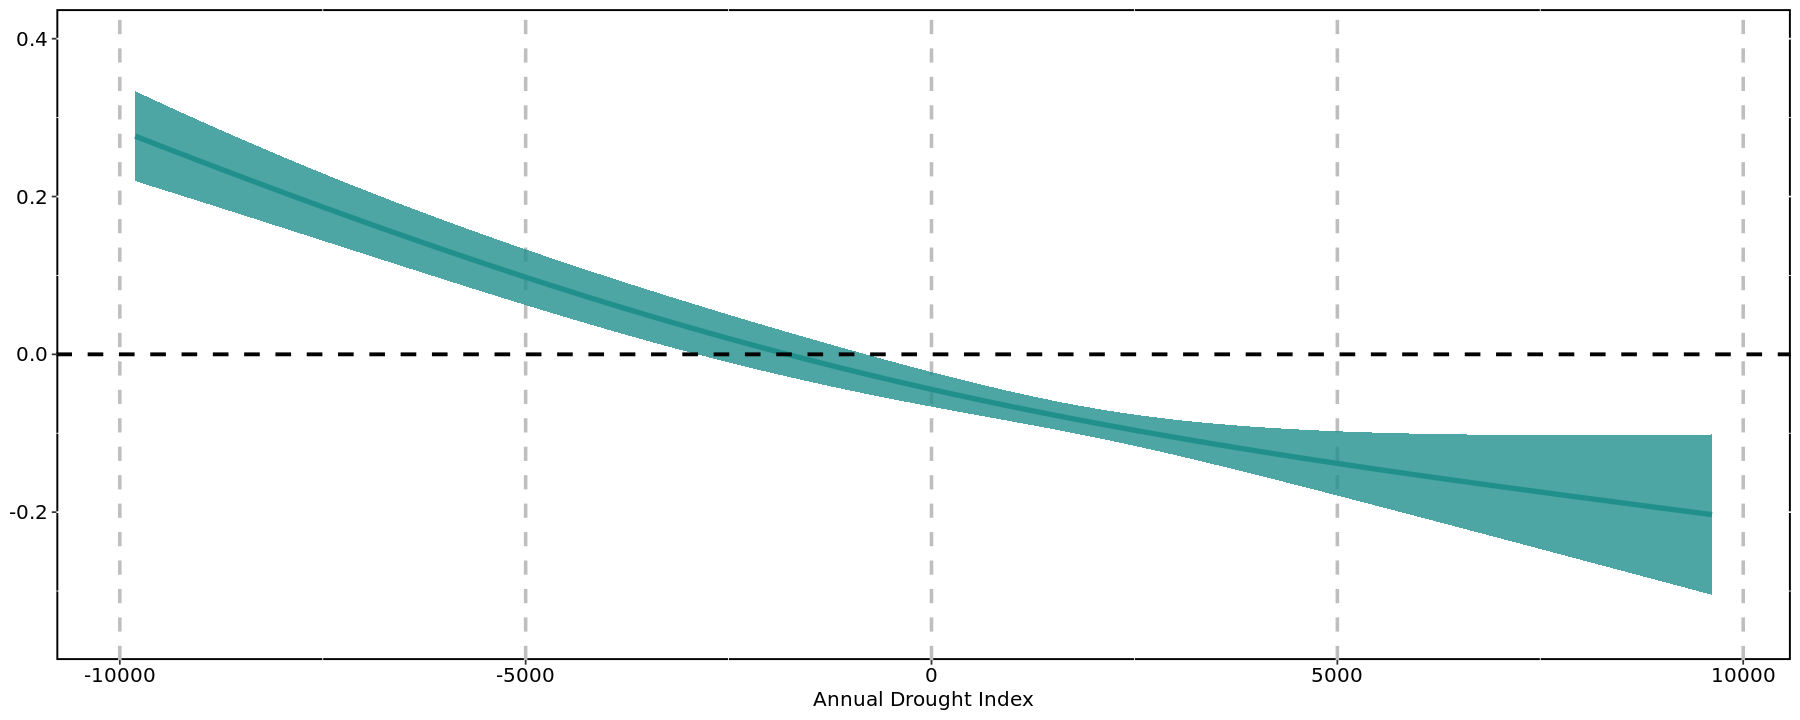

In [20]:
ggplot(menhaden, aes(x = Variable, y = Response))+
  geom_line(size = 1.5, color = "#440154FF") +
  geom_ribbon(aes(ymin = Response - Error, ymax = Response + Error), alpha = 0.8, fill = "#440154FF") +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed", size = 1.10) +
  ylim(-0.25, 0.70) +
  scale_x_continuous(breaks=seq(18,22, by= 0.5)) +
  labs(y = "Additive Effect (Median DOY)", x = "Average Yearly Temperature")  +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), panel.grid.major.x = element_line(color = "grey", size = 1, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))

ggplot(brownshrimp, aes(x = Variable, y = Response))+
  geom_line(size = 1.5, color = "#440154FF") +
  geom_ribbon(aes(ymin = Response - Error, ymax = Response + Error), alpha = 0.8, fill = "#440154FF") +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed", size = 1.10) +
  ylim(-0.25, 0.70) +
  scale_x_continuous(breaks=seq(18,22, by= 0.5)) +
  labs(y = "Additive Effect (Median DOY)", x = "Average Yearly Temperature")  +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), panel.grid.major.x = element_line(color = "grey", size = 1, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))

ggplot(stardrum, aes(x = Variable, y = Response))+
  geom_line(size = 1.5, color = "#FDE725FF") +
  geom_ribbon(aes(ymin = Response - Error, ymax = Response + Error), alpha = 0.8, fill = "#FDE725FF") +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed", size = 1.10) +
  ylim(-0.25, 0.70) +
  scale_x_continuous(breaks=seq(18,22, by= 0.5)) +
  labs(y = "Additive Effect (Median DOY)", x = "Average Yearly Temperature")  +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), panel.grid.major.x = element_line(color = "grey", size = 1, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))

ggplot(silverperch, aes(x = Variable, y = Response))+
  geom_line(size = 1.5, color = "#440154FF") +
  geom_ribbon(aes(ymin = Response - Error, ymax = Response + Error), alpha = 0.8, fill = "#440154FF") +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed", size = 1.10) +
  ylim(-0.35, 0.40) +
  scale_x_continuous(breaks=seq(-10000,10000, by= 5000)) +
  labs(y = "Additive Effect (Median DOY)", x = "Annual Drought Index")  +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), panel.grid.major.x = element_line(color = "grey", size = 1, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))

ggplot(stripedanchovy, aes(x = Variable, y = Response))+
  geom_line(size = 1.5, color = "#21908CFF") +
  geom_ribbon(aes(ymin = Response - Error, ymax = Response + Error), alpha = 0.8, fill = "#21908CFF") +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed", size = 1.10) +
  ylim(-0.35, 0.40) +
  scale_x_continuous(breaks=seq(-10000,10000, by= 5000)) +
  labs(y = "Additive Effect (Median DOY)", x = "Annual Drought Index")  +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), panel.grid.major.x = element_line(color = "grey", size = 1, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))

ggplot(pinkshrimp, aes(x = Variable, y = Response))+
  geom_line(size = 1.5, color = "#21908CFF") +
  geom_ribbon(aes(ymin = Response - Error, ymax = Response + Error), alpha = 0.8, fill = "#21908CFF") +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed", size = 1.10) +
  ylim(-0.35, 0.40) +
  scale_x_continuous(breaks=seq(-10000,10000, by= 5000)) +
  labs(y = "Additive Effect (Median DOY)", x = "Annual Drought Index")  +
  theme(panel.background = element_rect(fill = "white", color = "black", size = 1.1), axis.title.y = element_blank(), panel.grid.major.x = element_line(color = "grey", size = 1, linetype = "dashed"), axis.title = element_text(color = "black", family = "sans", size = 12), axis.text = element_text(color = "black", family = "sans", size = 12), legend.title = element_text(color = "black", family = "sans", size = 14), legend.text = element_text(color = "black", family = "sans", size = 12))